In [21]:
# Importing necessary libraries
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import pandas as pd  # For data manipulation and analysis
import warnings  # To handle warnings

warnings.filterwarnings('ignore')

In [22]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [23]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [26]:
import pandas as pd  

# Select the relevant columns from the training dataset
relevant_columns = [
    'GrLivArea', '1stFlrSF', '2ndFlrSF', 'LotArea',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'TotRmsAbvGrd',
    'SalePrice'
]

# Subset the training dataset to include only the relevant columns
train = train[relevant_columns]

# Display the first few rows of the modified training dataset to confirm the selection
print(train.head())

# Select the relevant columns from the testing dataset (excluding the target variable)
relevant_columns = [
    'GrLivArea', '1stFlrSF', '2ndFlrSF', 'LotArea',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'TotRmsAbvGrd'
]

# Subset the testing dataset to include only the relevant columns
test = test[relevant_columns]

# Display the first few rows of the modified testing dataset to confirm the selection
print(test.head())

   GrLivArea  1stFlrSF  2ndFlrSF  LotArea  BsmtFullBath  BsmtHalfBath  \
0       1710       856       854     8450             1             0   
1       1262      1262         0     9600             0             1   
2       1786       920       866    11250             1             0   
3       1717       961       756     9550             1             0   
4       2198      1145      1053    14260             1             0   

   FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  SalePrice  
0         2         1             3             8     208500  
1         2         0             3             6     181500  
2         2         1             3             6     223500  
3         1         0             3             7     140000  
4         2         1             4             9     250000  
   GrLivArea  1stFlrSF  2ndFlrSF  LotArea  BsmtFullBath  BsmtHalfBath  \
0        896       896         0    11622           0.0           0.0   
1       1329      1329         0    1

In [27]:
print(train.isnull().sum())
print(test.isnull().sum())

# Fill missing values in the training & testing dataset with the column mean
test.fillna(test.mean(), inplace=True)  
train.fillna(train.mean(), inplace=True)

# Confirm that there are no more missing values in the training & testing dataset
print(train.isnull().sum())
print(test.isnull().sum())

GrLivArea       0
1stFlrSF        0
2ndFlrSF        0
LotArea         0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64
GrLivArea       0
1stFlrSF        0
2ndFlrSF        0
LotArea         0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
dtype: int64
GrLivArea       0
1stFlrSF        0
2ndFlrSF        0
LotArea         0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
SalePrice       0
dtype: int64
GrLivArea       0
1stFlrSF        0
2ndFlrSF        0
LotArea         0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
dtype: int64


In [28]:
print(train.duplicated().sum())
print(test.duplicated().sum())

# Remove duplicate rows from the training & testing dataset
test.drop_duplicates(inplace=True)
train.drop_duplicates(inplace=True)

# Confirm that there are no more duplicate rows in the training & testing dataset
print(train.duplicated().sum())
print(test.duplicated().sum())

1
8
0
0


In [29]:
# Calculate total area in the training dataset
train['Area'] = train['GrLivArea']

# Calculate total bathrooms in the training dataset (sum of FullBath and HalfBath)
train['TotalBathrooms'] = train['FullBath'] + train['HalfBath'] + train['BsmtFullBath'] + train['BsmtHalfBath']

# Calculate total bedrooms in the training dataset
train['TotalBedrooms'] = train['TotRmsAbvGrd']

# Display the first few rows of the modified training dataset to confirm the new columns
print(train.head())


# Calculate total area in the testing dataset (assuming GrLivArea represents total area)
test['Area'] = test['GrLivArea']

# Calculate total bathrooms in the testing dataset (sum of FullBath and HalfBath)
test['TotalBathrooms'] = test['FullBath'] + test['HalfBath'] + test['BsmtFullBath'] + test['BsmtHalfBath']

# Calculate total bedrooms in the testing dataset
test['TotalBedrooms'] = test['TotRmsAbvGrd']

# Display the first few rows of the modified testing dataset to confirm the new columns
print(test.head())

   GrLivArea  1stFlrSF  2ndFlrSF  LotArea  BsmtFullBath  BsmtHalfBath  \
0       1710       856       854     8450             1             0   
1       1262      1262         0     9600             0             1   
2       1786       920       866    11250             1             0   
3       1717       961       756     9550             1             0   
4       2198      1145      1053    14260             1             0   

   FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  SalePrice  Area  \
0         2         1             3             8     208500  1710   
1         2         0             3             6     181500  1262   
2         2         1             3             6     223500  1786   
3         1         0             3             7     140000  1717   
4         2         1             4             9     250000  2198   

   TotalBathrooms  TotalBedrooms  
0               4              8  
1               3              6  
2               4              6  


In [30]:
# Select relevant columns from the training dataset for model training
train = train[['Area', 'TotalBathrooms', 'TotalBedrooms', 'SalePrice']]
# Display the first few rows of the modified training dataset to confirm the selection
print(train.head())


# Select relevant columns from the testing dataset for model prediction
test = test[['Area', 'TotalBathrooms', 'TotalBedrooms']]
# Display the first few rows of the modified testing dataset to confirm the selection
print(test.head())

   Area  TotalBathrooms  TotalBedrooms  SalePrice
0  1710               4              8     208500
1  1262               3              6     181500
2  1786               4              6     223500
3  1717               2              7     140000
4  2198               4              9     250000
   Area  TotalBathrooms  TotalBedrooms
0   896             1.0              5
1  1329             2.0              6
2  1629             3.0              6
3  1604             3.0              7
4  1280             2.0              5


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = train[['Area', 'TotalBathrooms', 'TotalBedrooms']]
y_train = train['SalePrice']

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
X_test = test[['Area', 'TotalBathrooms', 'TotalBedrooms']]
y_pred = model.predict(X_test)

# Evaluate the model on training data (for illustration)
y_train_pred = model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(train_rmse)
print(f"\nTrain RMSE: {train_rmse:.2f}")


Train RMSE: 2788302551.86



Train RMSE: 1738214514.15


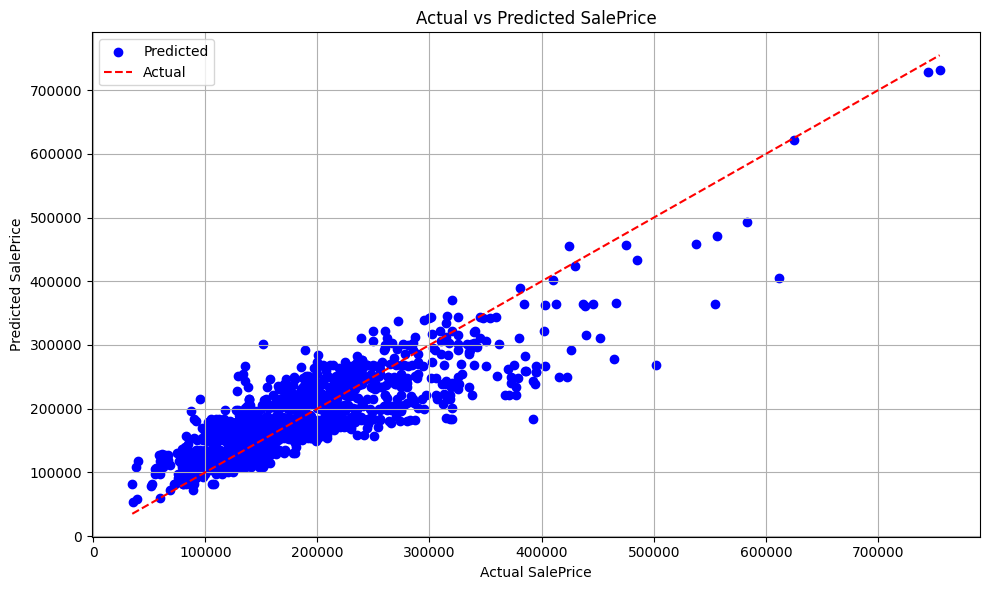

In [37]:
# Import necessary libraries for model evaluation and visualization
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Separate features and target for training
X_train = train[['Area', 'TotalBathrooms', 'TotalBedrooms']]
y_train = train['SalePrice']

# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the validation data
y_pred = model.predict(X_train)

y_train_pred = model.predict(X_train)
train_rmse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(train_rmse)
print(f"\nTrain RMSE: {train_rmse:.2f}")

import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, color='blue', label='Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Actual')
plt.title('Actual vs Predicted SalePrice')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

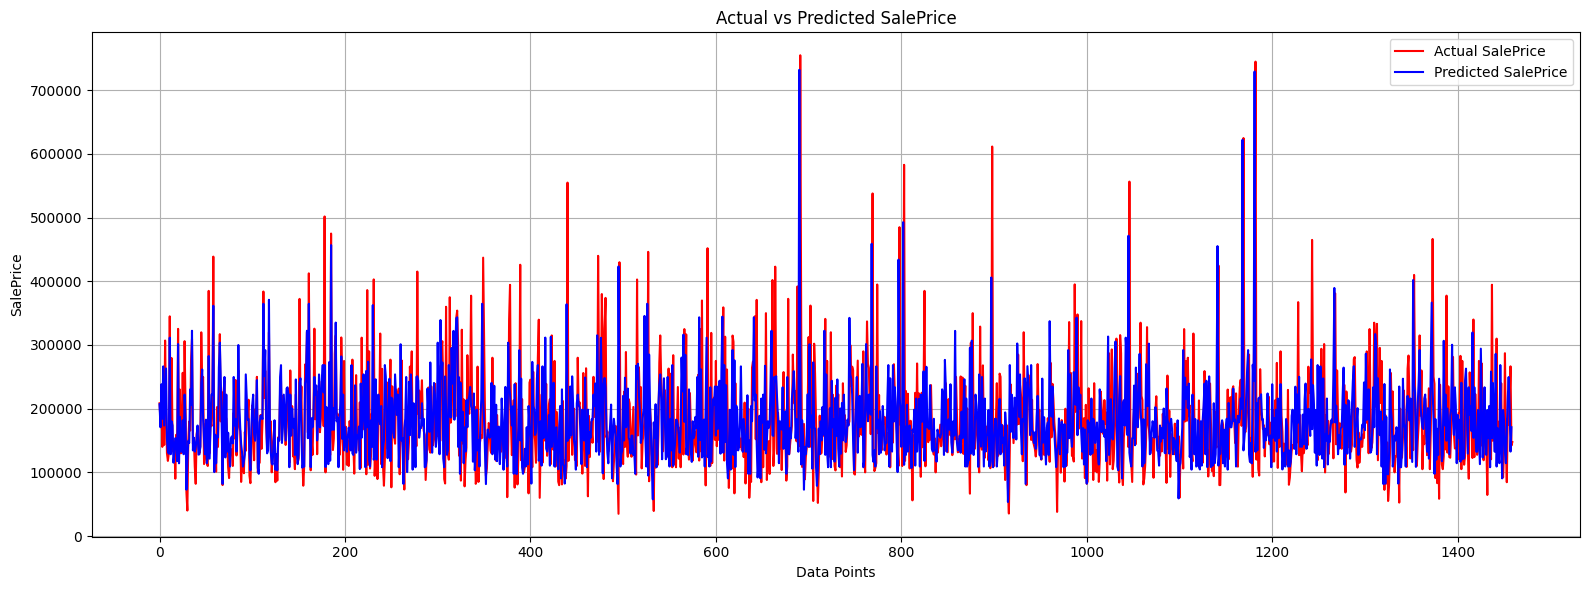

In [38]:
import matplotlib.pyplot as plt

# Assuming y_train and y_train_pred are already defined
plt.figure(figsize=(16, 6))

# Plotting actual and predicted values as lines
plt.plot(y_train, color='red', label='Actual SalePrice')
plt.plot(y_train_pred, color='blue', label='Predicted SalePrice')

plt.title('Actual vs Predicted SalePrice')
plt.xlabel('Data Points')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
import pickle

# Save the model to disk
with open('model.h5', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as model.h5")

Model saved successfully as model.h5


In [40]:
import pickle

# Load the model from disk
with open('model.h5', 'rb') as file:
    model = pickle.load(file)

def predict_sale_price(area, bedrooms, bathrooms):
    # Prepare the input data as a 2D array (since the model expects a 2D array)
    input_data = [[area, bedrooms, bathrooms]]

    # Make the prediction
    predicted_price = model.predict(input_data)

    return predicted_price[0]

# Get user input
area = float(input("Enter the area: "))
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))

# Predict the sale price
predicted_price = predict_sale_price(area, bedrooms, bathrooms)

print(f"The predicted sale price is: ${predicted_price:.2f}")

Enter the area:  1200
Enter the number of bedrooms:  4
Enter the number of bathrooms:  2


The predicted sale price is: $168114.35
